In [2]:

import matplotlib.pyplot as plt
import mysql.connector
import pandas as pd
import seaborn as sns



In [3]:
# Se cargan los datos del CSV
ruta_archivo = "/Users/marco.arenas/Downloads/datos_apuestas_limpio.csv"
df = pd.read_csv(ruta_archivo)

df.head()

,MES,DIA,DANE,TIPOJUEGO,NOMBRE_LOTERIA,NOMBRE_MODALIDAD,NUMEROAPOSTADO,EDAD,GENERO,VALORAPOSTADO,JORNADA
0,1,30,nóvita,chance,huila,cuatro cifras directo,3333,59,f,60,Mañana
1,1,30,nóvita,chance,huila,cuatro cifras directo,9999,59,f,60,Mañana
2,1,30,quibdó,dobleacierto 4c 1000,cafetero dia,dobleacierto 4cif 1000,1270,44,m,100,Mañana
3,1,30,quibdó,dobleacierto 4c 1000,cafetero dia,dobleacierto 4cif 1000,1701,44,m,100,Mañana
4,1,30,quibdó,dobleacierto 4c 1000,cafetero dia,dobleacierto 4cif 1000,2009,44,m,100,Mañana


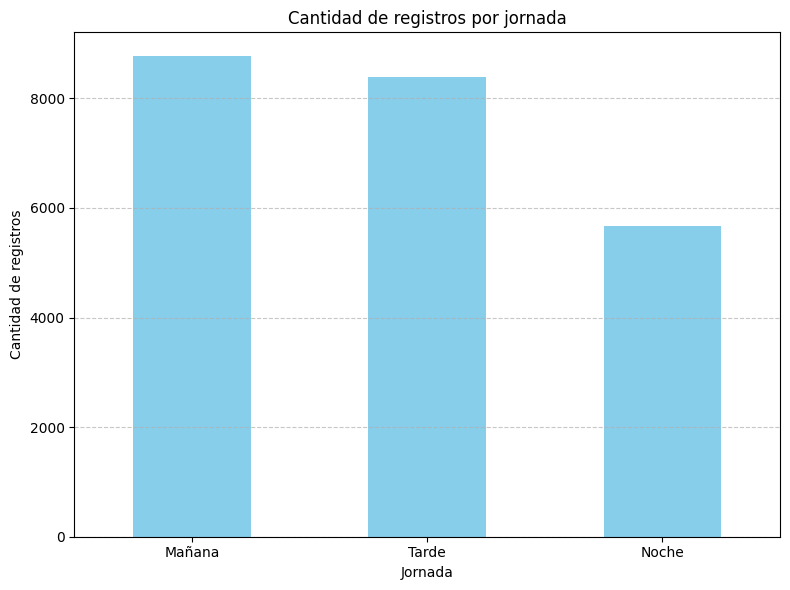

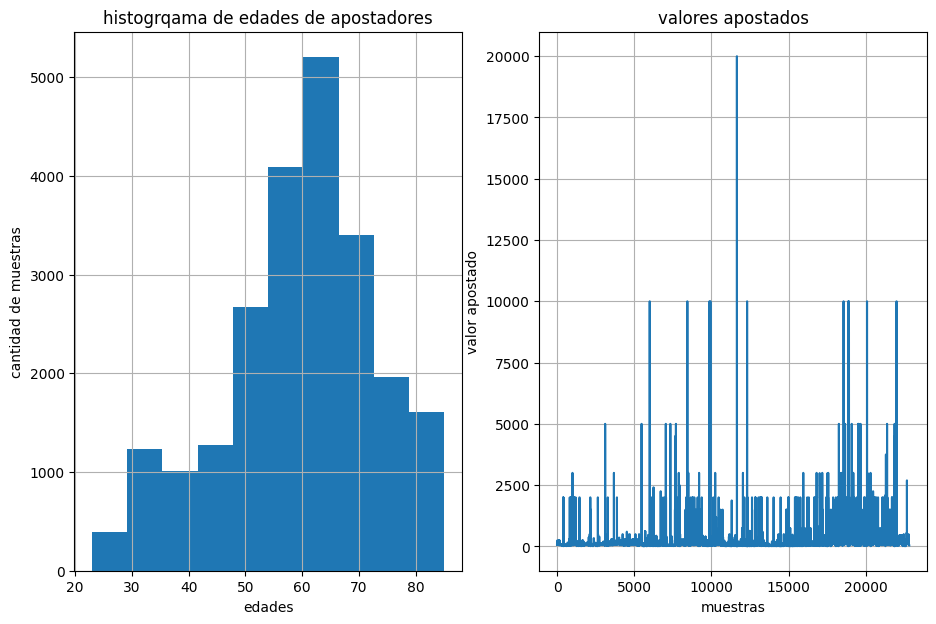

/var/folders/gr/cxf8bnkn773cdh28b96btbm80000gp/T/ipykernel_23847/944016645.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df["EDAD"],palette="bright")
/var/folders/gr/cxf8bnkn773cdh28b96btbm80000gp/T/ipykernel_23847/944016645.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df["VALORAPOSTADO"],palette="crest")
/var/folders/gr/cxf8bnkn773cdh28b96btbm80000gp/T/ipykernel_23847/944016645.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df["DIA"],palette="crest")


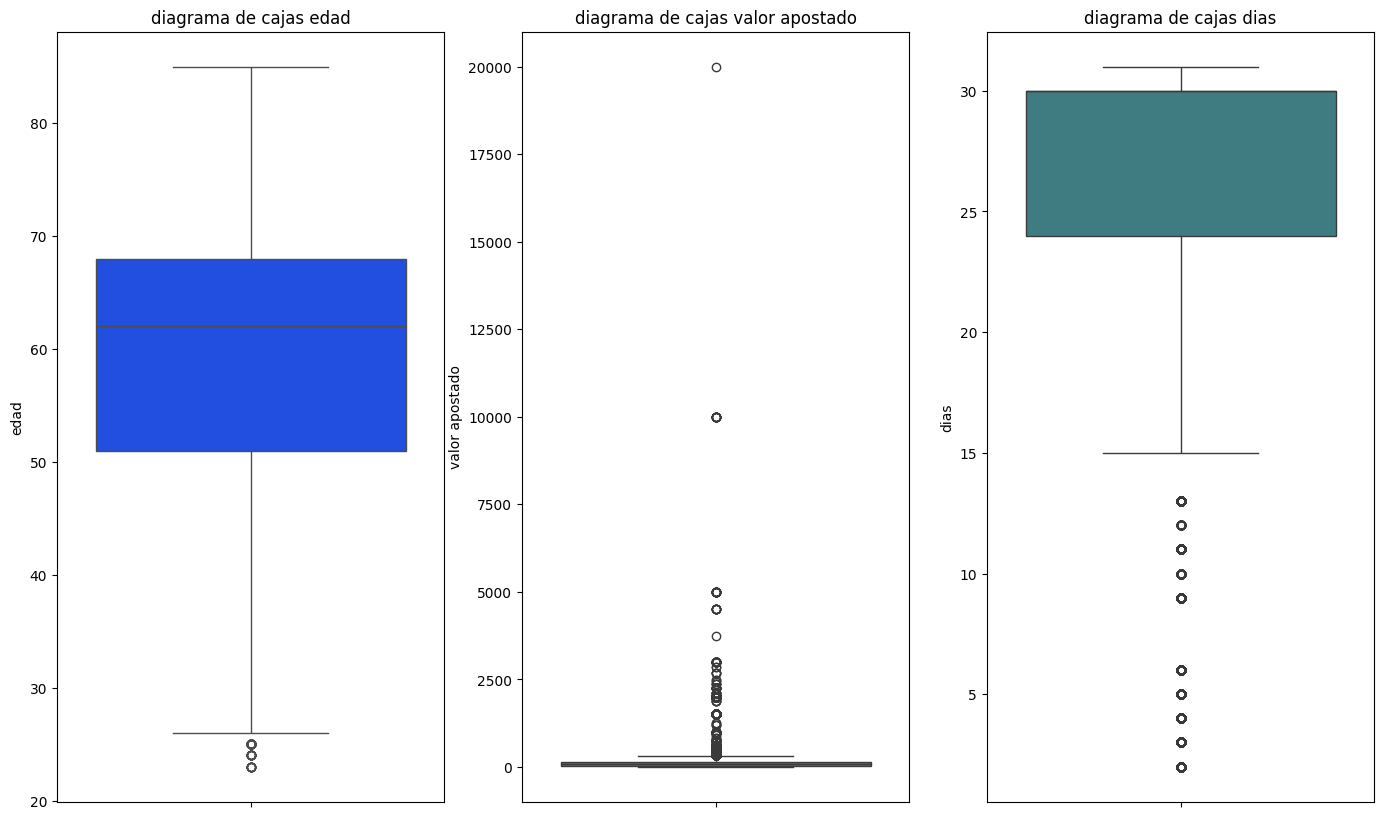

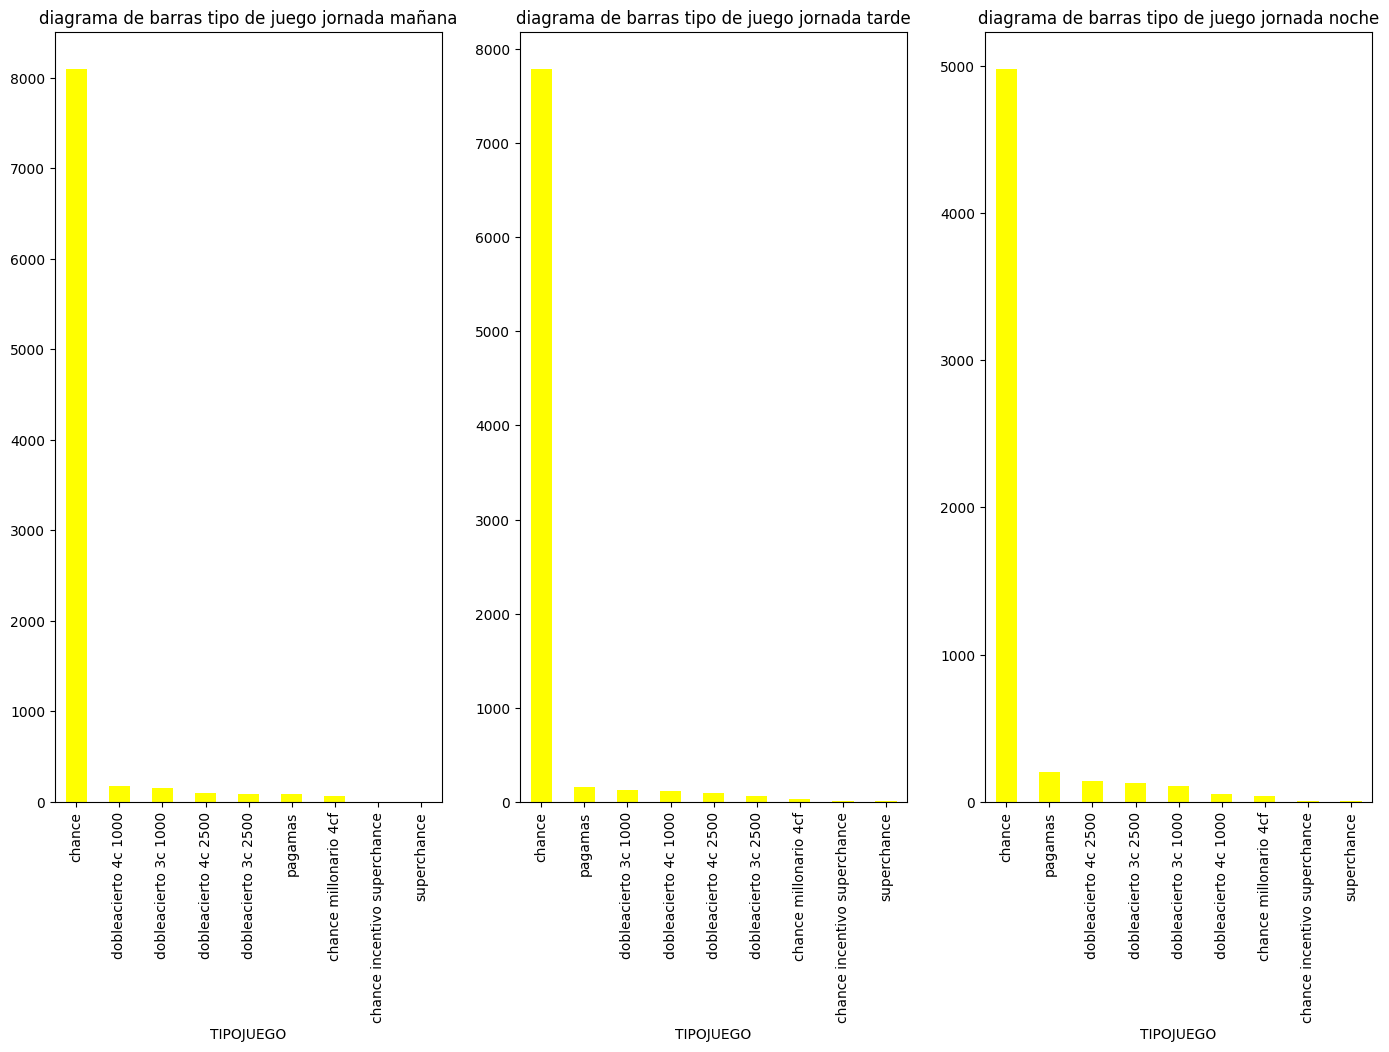

/var/folders/gr/cxf8bnkn773cdh28b96btbm80000gp/T/ipykernel_23847/944016645.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='TIPOJUEGO', palette='Set2')


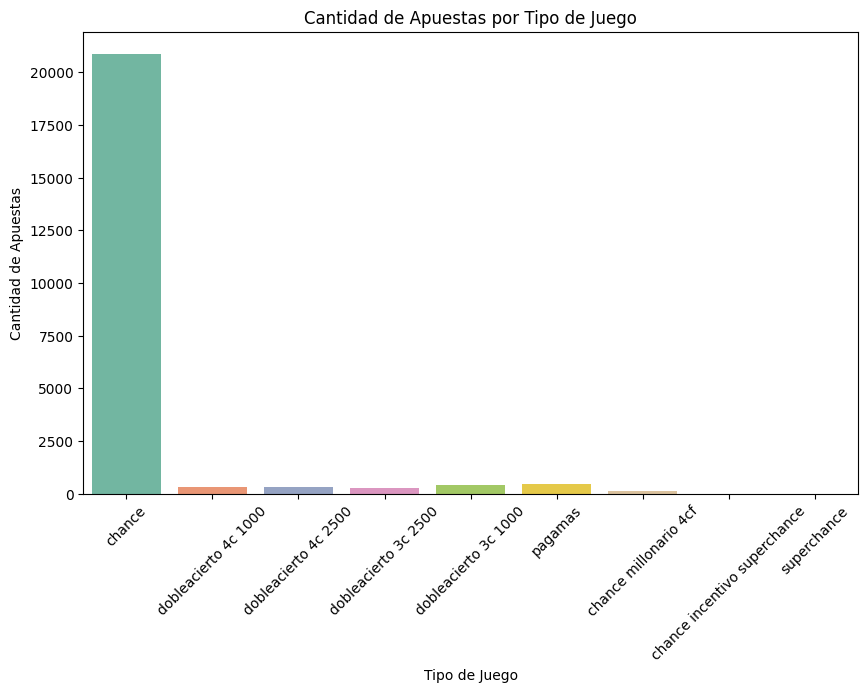

/var/folders/gr/cxf8bnkn773cdh28b96btbm80000gp/T/ipykernel_23847/944016645.py:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='TIPOJUEGO', y='VALORAPOSTADO', palette='pastel')


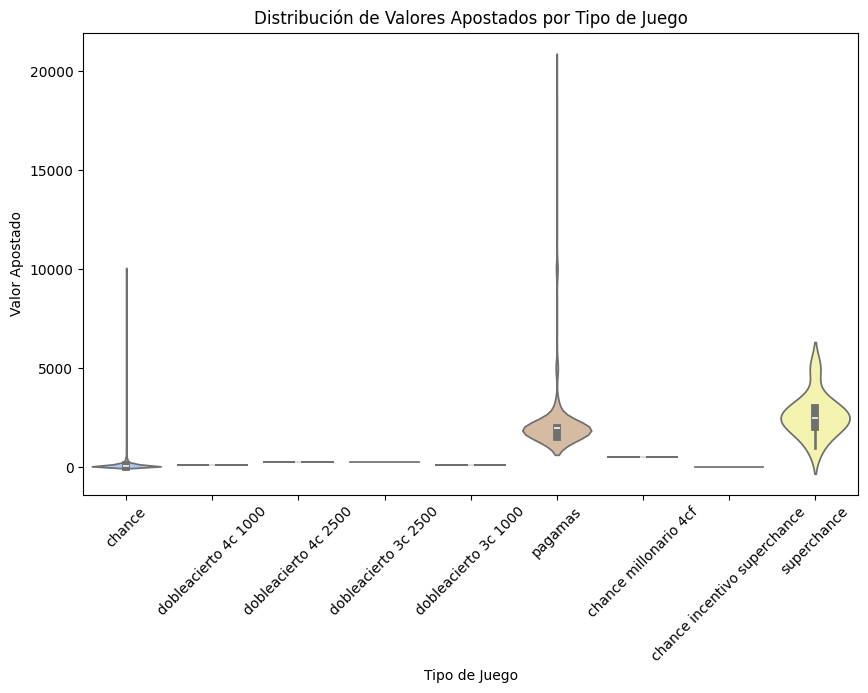

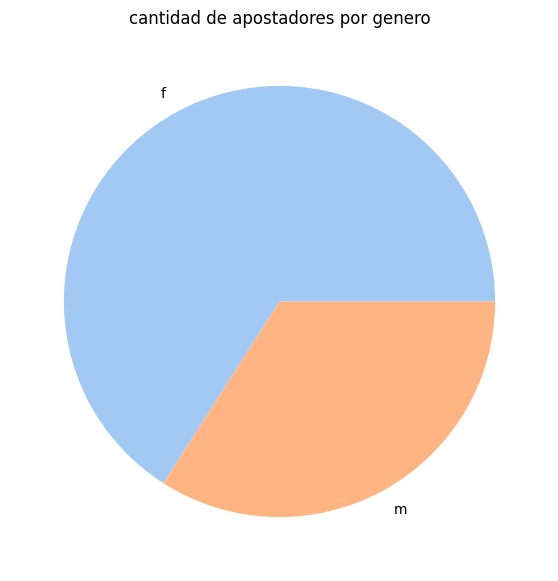

In [4]:
def cant_registros_por_juego(df):
  conteo_jornadas = df['JORNADA'].value_counts()
  plt.figure(figsize=(8, 6))
  conteo_jornadas.plot(kind='bar', color='skyblue')
  plt.title('Cantidad de registros por jornada')
  plt.xlabel('Jornada')
  plt.ylabel('Cantidad de registros')
  plt.xticks(rotation=0)
  plt.grid(axis='y', linestyle='--', alpha=0.7)
  plt.tight_layout()
  plt.show()

def histogramas_edades_apostadores(df):
  plt.figure(figsize=(17,7))
  plt.subplot(131)
  plt.hist(df["EDAD"])
  plt.title("histogrqama de edades de apostadores")
  plt.ylabel("cantidad de muestras")
  plt.xlabel("edades")
  plt.grid(True)
  plt.subplot(132)
  plt.plot(df["VALORAPOSTADO"])
  plt.title("valores apostados")
  plt.ylabel("valor apostado")
  plt.xlabel("muestras")
  plt.grid(True)
  plt.show()

def diagramas_cajas(df):
  plt.figure(figsize=(17,10))
  plt.subplot(131)
  sns.boxplot(df["EDAD"],palette="bright")
  plt.title("diagrama de cajas edad")
  plt.ylabel("edad")
  plt.subplot(132)
  sns.boxplot(df["VALORAPOSTADO"],palette="crest")
  plt.title("diagrama de cajas valor apostado")
  plt.ylabel("valor apostado")
  plt.subplot(133)
  sns.boxplot(df["DIA"],palette="crest")
  plt.title("diagrama de cajas dias")
  plt.ylabel("dias")

def jugadas_jorgadas(df):
  condicion1=df["JORNADA"]=="Mañana"
  condicion2=df["JORNADA"]=="Tarde"
  condicion3=df["JORNADA"]=="Noche"
  plt.figure(figsize=(17,10))
  plt.subplot(131)
  conteo_jornada_manana=df["TIPOJUEGO"][condicion1].value_counts()
  conteo_jornada_manana.plot(kind='bar',color="yellow")
  plt.title("diagrama de barras tipo de juego jornada mañana")
  plt.subplot(132)
  conteo_jornada_tarde=df["TIPOJUEGO"][condicion2].value_counts()
  conteo_jornada_tarde.plot(kind='bar',color="yellow")
  plt.title("diagrama de barras tipo de juego jornada tarde")
  plt.subplot(133)
  conteo_jornada_tarde=df["TIPOJUEGO"][condicion3].value_counts()
  conteo_jornada_tarde.plot(kind='bar',color="yellow")
  plt.title("diagrama de barras tipo de juego jornada noche")
  plt.show()

def cant_apuestas_tipojuego(df):
  plt.figure(figsize=(10, 6))
  sns.countplot(data=df, x='TIPOJUEGO', palette='Set2')
  plt.title('Cantidad de Apuestas por Tipo de Juego')
  plt.xlabel('Tipo de Juego')
  plt.ylabel('Cantidad de Apuestas')
  plt.xticks(rotation=45)
  plt.show()

def violin_distribucion(df):
  plt.figure(figsize=(10, 6))
  sns.violinplot(data=df, x='TIPOJUEGO', y='VALORAPOSTADO', palette='pastel')
  plt.title('Distribución de Valores Apostados por Tipo de Juego')
  plt.xlabel('Tipo de Juego')
  plt.ylabel('Valor Apostado')
  plt.xticks(rotation=45)
  plt.show()

def apostadores_genero(df):
  condicion4=df["GENERO"].value_counts()
  plt.figure(figsize=(7,7))
  colors1 = sns.color_palette("pastel")
  plt.pie(condicion4,labels={"m","f"},colors=colors1)
  plt.title("cantidad de apostadores por genero")
  plt.show


cant_registros_por_juego(df)
histogramas_edades_apostadores(df)
diagramas_cajas(df)
jugadas_jorgadas(df)
cant_apuestas_tipojuego(df)
violin_distribucion(df)
apostadores_genero(df)

In [5]:
conn=mysql.connector.connect(user="root",password="",host="localhost")
cursor=conn.cursor()
query="SHOW DATABASES"
cursor.execute(query)
for x in cursor:
    print(x)

    
conn.close()

('apuestas',)
('information_schema',)
('mysql',)
('performance_schema',)
('sys',)


In [6]:
conn=mysql.connector.connect(user="root",password="",host="localhost")
cursor=conn.cursor()
query="DROP DATABASE apuestas"
cursor.execute(query)

    
conn.close()

In [7]:
conn=mysql.connector.connect(user="root",password="",host="localhost")
cursor=conn.cursor()
query="CREATE DATABASE apuestas"
cursor.execute(query)

    
conn.close()

In [8]:
conn=mysql.connector.connect(user="root",password="",host="localhost",database="apuestas")
cursor=conn.cursor()
query="SHOW TABLES"
cursor.execute(query)
for x in cursor:
    print(x)
    
conn.close()

In [9]:
conn=mysql.connector.connect(user="root",password="",host="localhost",database="apuestas")
cursor=conn.cursor()
query="""CREATE TABLE datos_apuestas(MES int NULL, DIA int NOT NULL, DANE varchar(80) NOT NULL, TIPOJUEGO varchar(80) NULL, NOMBRE_LOTERIA varchar(50) NULL, NOMBRE_MODALIDAD varchar(50) NULL, NUMEROAPOSTADO varchar(10) NULL, EDAD int NULL, GENERO varchar(3) NULL, VALORAPOSTADO int NULL, JORNADA varchar(50) NULL);"""
cursor.execute(query)
conn.commit()

    
conn.close()

In [10]:
def leer():
    conn=mysql.connector.connect(user="root",password="",host="localhost",database="apuestas")
    cursor=conn.cursor()
    query=f'SELECT * FROM datos_apuestas;'
    cursor.execute(query)
    datos=cursor.fetchall()
    conn.commit()
    conn.close()
    for x in datos:
        print(x)
    

In [11]:
leer()

In [12]:
conn=mysql.connector.connect(user="root",password="",host="localhost",database="apuestas")
cursor=conn.cursor()

# Volcar los datos desde el DataFrame de pandas a la tabla MySQL
for index, row in df.iterrows():
    cursor.execute("""
        INSERT INTO datos_apuestas 
        (MES, DIA, DANE, TIPOJUEGO, NOMBRE_LOTERIA, NOMBRE_MODALIDAD, NUMEROAPOSTADO, EDAD, GENERO, VALORAPOSTADO, JORNADA)
        VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
    """, (row['MES'], row['DIA'], row['DANE'], row['TIPOJUEGO'], row['NOMBRE_LOTERIA'], row['NOMBRE_MODALIDAD'], row['NUMEROAPOSTADO'], row['EDAD'], row['GENERO'], row['VALORAPOSTADO'], row['JORNADA']))
    conn.commit()
    
conn.close()

In [13]:
leer()

(1, 30, 'nóvita', 'chance', 'huila', 'cuatro cifras directo', '3333', 59, 'f', 60, 'Mañana')
(1, 30, 'nóvita', 'chance', 'huila', 'cuatro cifras directo', '9999', 59, 'f', 60, 'Mañana')
(1, 30, 'quibdó', 'dobleacierto 4c 1000', 'cafetero dia', 'dobleacierto 4cif 1000', '1270', 44, 'm', 100, 'Mañana')
(1, 30, 'quibdó', 'dobleacierto 4c 1000', 'cafetero dia', 'dobleacierto 4cif 1000', '1701', 44, 'm', 100, 'Mañana')
(1, 30, 'quibdó', 'dobleacierto 4c 1000', 'cafetero dia', 'dobleacierto 4cif 1000', '2009', 44, 'm', 100, 'Mañana')
(1, 30, 'quibdó', 'dobleacierto 4c 1000', 'cafetero dia', 'dobleacierto 4cif 1000', '2200', 44, 'm', 100, 'Mañana')
(1, 30, 'quibdó', 'dobleacierto 4c 1000', 'cafetero dia', 'dobleacierto 4cif 1000', '7575', 44, 'm', 100, 'Mañana')
(1, 30, 'quibdó', 'dobleacierto 4c 1000', 'chontico dia', 'dobleacierto 4cif 1000', '1270', 44, 'm', 100, 'Mañana')
(1, 30, 'quibdó', 'dobleacierto 4c 1000', 'chontico dia', 'dobleacierto 4cif 1000', '1701', 44, 'm', 100, 'Mañana')
(1

In [14]:
def leer_cantnumeros_tipojuego():
    conn=mysql.connector.connect(user="root",password="",host="localhost",database="apuestas")
    cursor=conn.cursor()
    query=f'SELECT TIPOJUEGO, NUMEROAPOSTADO, count(NUMEROAPOSTADO) cant FROM datos_apuestas group by TIPOJUEGO, NUMEROAPOSTADO;'
    cursor.execute(query)
    datos=cursor.fetchall()
    conn.commit()
    conn.close()
    for x in datos:
        print(x)

In [15]:
leer_cantnumeros_tipojuego()

('chance', '3333', 81)
('chance', '9999', 142)
('dobleacierto 4c 1000', '1270', 7)
('dobleacierto 4c 1000', '1701', 11)
('dobleacierto 4c 1000', '2009', 7)
('dobleacierto 4c 1000', '2200', 7)
('dobleacierto 4c 1000', '7575', 7)
('dobleacierto 4c 2500', '1270', 2)
('dobleacierto 4c 2500', '1701', 2)
('dobleacierto 4c 2500', '2009', 2)
('dobleacierto 4c 2500', '2200', 2)
('dobleacierto 4c 2500', '7575', 2)
('chance', '319', 28)
('chance', '328', 14)
('chance', '723', 7)
('chance', '823', 14)
('chance', '924', 17)
('chance', '1212', 83)
('chance', '1328', 12)
('chance', '1723', 7)
('chance', '1924', 15)
('chance', '4723', 4)
('chance', '7023', 5)
('chance', '7328', 2)
('chance', '0', 372)
('chance', '105', 40)
('chance', '524', 50)
('chance', '1103', 7)
('chance', '3101', 16)
('chance', '4444', 111)
('chance', '5555', 125)
('chance', '6666', 85)
('chance', '7777', 104)
('chance', '8888', 132)
('chance', '124', 10)
('chance', '126', 5)
('chance', '131', 24)
('chance', '1111', 147)
('chance

In [20]:
conn=mysql.connector.connect(user="root",password="",host="localhost",database="apuestas")
cursor=conn.cursor()
query=f"DELETE FROM datos_apuestas WHERE tipojuego = 'chance' ;"
cursor.execute(query)
conn.commit()
conn.close()

In [21]:

def leer_cantnumeros_tipojuego_grafica():
    conn = mysql.connector.connect(user="root", password="", host="localhost", database="apuestas")
    cursor = conn.cursor()
    query = 'SELECT TIPOJUEGO, NUMEROAPOSTADO, COUNT(NUMEROAPOSTADO) AS cant FROM datos_apuestas GROUP BY TIPOJUEGO, NUMEROAPOSTADO;'
    cursor.execute(query)
    datos = cursor.fetchall()
    conn.close()
    
    # Diccionario para almacenar la cantidad de números por tipo de juego
    cantidades_por_juego = {}
    for tipojuego, numeroapostado, cantidad in datos:
        if tipojuego not in cantidades_por_juego:
            cantidades_por_juego[tipojuego] = 0
        cantidades_por_juego[tipojuego] += cantidad
    
    # Crear la gráfica
    tipos_juego = list(cantidades_por_juego.keys())
    cantidades = list(cantidades_por_juego.values())
    
    plt.bar(tipos_juego, cantidades)
    plt.xlabel('Tipo de Juego')
    plt.ylabel('Cantidad de Números Apostados')
    plt.title('Cantidad de Números Apostados por Tipo de Juego')
    plt.xticks(rotation=45)
    plt.show()

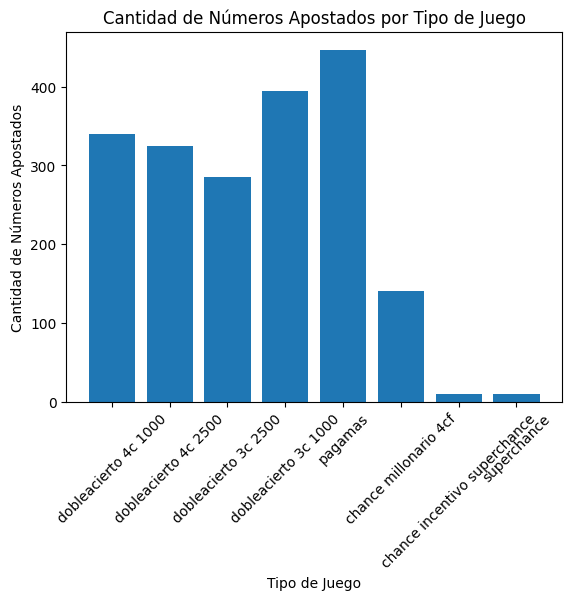

In [22]:
leer_cantnumeros_tipojuego_grafica()